In [70]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns

In [72]:
!ls

README.md         attacks.csv       clean.ipynb
analysis.ipynb    attacks_clean.csv


In [73]:
file = '../Pandas-project/attacks_clean.csv'
df = pd.read_csv(file, index_col=0)

In [79]:
df.sample(5)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,Case Number.1,original order
2333,Reported 28-Oct-1995,1995.0,Unprovoked,USA,Florida,-,Boogie boarding,Matthew Beyrer,M,13,Lacerations to right foot,N,-,-,"Flagler/Palm Coast News Tribune, 10/28/1995",1995.10.28.R-Beyrer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1995.10.28.R,3970.0
2721,23-Jul-1988,1988.0,Unprovoked,BAHAMAS,-,-,Free diving & spearfishing,Kenny Isham,M,-,Hand bitten,N,-,2 m to 2.5 m shark,"E. Pace, FSAF",1988.07.23-Isham.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1988.07.23,3582.0
2485,Aug-1993,1993.0,Boat,EL SALVADOR,La Libertad,La Libertad,Oyster fishing,"boat, occupants: 2 men",-,-,FATAL x 2,Y,-,White shark?,"Tampa Tribune, 9/18/1993",1993.08.00.a-El-Salvador.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1993.08.00.a,3818.0
4395,21-Dec-1952,1952.0,Unprovoked,AUSTRALIA,South Australia,Cape Douglas,"Fishing, setting nets",John Holmes,M,25,Bitten on thigh and buttocks,N,"""After dark""",2.4 m [8'] shark,"V.M. Coppleson (1958), p.178; V.M. Coppleson (...",1952.12.21-Holmes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.12.21,1908.0
1126,16-May-2009,2009.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Bryan Heath,M,49,Lacerations to right foot,N,10h27,blacktip or spinner shark,"S. Petersohn, GSAF",2009.05.16.b-Heath.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.05.16.b,5177.0


In [84]:
# We print the columns to see the 'Species' column that has an space ' ' at the end of its name, so we were having
# trouble to plot it.
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'href', 'Case Number.1',
       'original order'],
      dtype='object')

In [171]:
# We rename the columns in order to make them ploatable.
df = df.rename(columns={'Species ': 'Species'})
df = df.rename(columns={'Sex ': 'Sex'})
# And then we print the most repeated values in the columns of interest to see what we can understand with the info.
print(df['Species'].value_counts()[:5])
print('\n_________________\n')
print(df['Country'].value_counts()[:10])
print('\n_________________\n')
print(df['Sex'].value_counts()[:2])
print('\n_________________\n')
print(df['Age'].value_counts()[:10])

-                                                     2845
White shark                                            163
Shark involvement prior to death was not confirmed     105
Invalid                                                102
Shark involvement not confirmed                         88
Name: Species, dtype: int64

_________________

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
Name: Country, dtype: int64

_________________

M    5094
F     637
Name: Sex, dtype: int64

_________________

-     2838
17     154
18     150
19     142
20     141
15     139
16     138
21     119
22     117
25     108
Name: Age, dtype: int64


In [ ]:
# Our hypothesis is simple: We want to check if the most affected overall sex by the shark attacks 
# in the dataframe is male. We want to check if the top countries affected by these shark attacks 
# are from the Caribbean Sea and also if the top death rate filtered by age results to be a young one.

<AxesSubplot:>

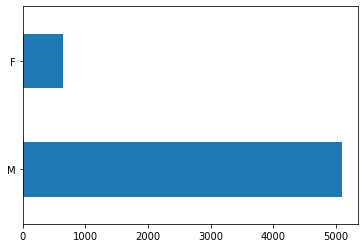

In [166]:
# We start to plot all the graphics that we need in order to analyze and visualize more clearly the data.
count = df.value_counts(df['Sex'].values, sort=True)[:2]
count.plot.barh()

<AxesSubplot:>

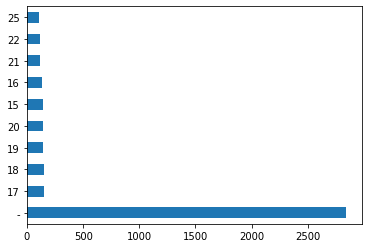

In [167]:
count_1 = df.value_counts(df['Age'].values, sort=True)[:10]
count_1.plot.barh()

<AxesSubplot:>

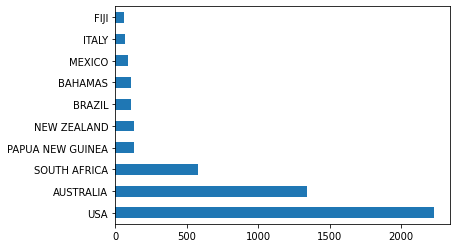

In [168]:
count_2 = df.value_counts(df['Country'].values, sort=True)[:10]
count_2.plot.barh()

In [ ]:
'''

STORYTELLING/CONCLUSION:
------------------------

Once we've cleaned and explored this dataset, we come to some conclusions (guided by the data):

- First, we observe that the sex most affected by the shark attacks is by a huge difference male
(between 8 and 9 times bigger).

- Secondly we can appreciate that this deaths occurred all over the world and not only in a particular continent or
area. The country that registered the biggest number of attacks were USA (close to the Caribbean Sea), followed by Australia and South Africa.
But there's a big difference between the number of attacks between those countries. A difference that grows smaller
as we can see as the list goes on an shows countris with much more less registered attacks.

- Third, we see that the most affected group of age were late teenagers, being them the top ages that suffered from
this attacks. As we go down on the list we see suddenly that 15 and 16 years old people were less attacked than people
one, two or even five years older, so we may conclude that the average of the people's age that does surf, swimming
or fishing is young but not too young.

'''